In [31]:
import numpy as np
from fenics import *
import matplotlib.pyplot as plt
from matplotlib.image import imread
from scipy.interpolate import interpn

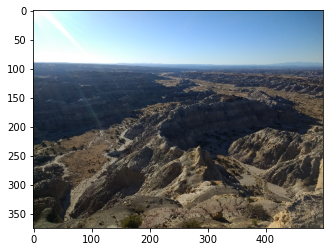

In [32]:
img = imread('angel_peak_badlands.png')

plt.imshow(img)
plt.title('image loaded into numpy')

Text(0.5, 1.0, 'grayscale image mapped to domain coordinates')

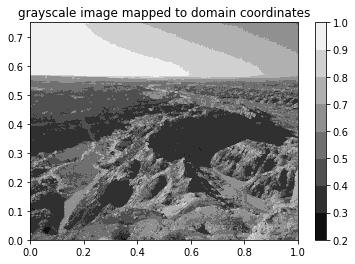

In [57]:
gray_img = np.mean(img, axis=-1)[::-1,:] # [::-1,:] flip because image array goes top left to bottom right

width = 1.0
height = gray_img.shape[0]/gray_img.shape[1]

xx = np.linspace(0, width, gray_img.shape[1])
yy = np.linspace(0, height, gray_img.shape[0])

plt.contourf(xx, yy, gray_img, cmap='gray')
plt.colorbar()
plt.title('grayscale image mapped to domain coordinates')

Text(0.5, 1.0, 'fenics Function')

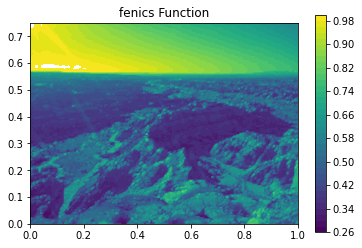

In [59]:
mesh_h = 0.005
mesh_nx = int(width / mesh_h)
mesh_ny = int(height / mesh_h)

mesh = RectangleMesh(Point(0., 0.), Point(width, height), mesh_nx, mesh_ny)
V = FunctionSpace(mesh, 'CG', 1)
coords = V.tabulate_dof_coordinates()

f = Function(V)
f.vector()[:] = interpn((xx, yy), gray_img.swapaxes(0,1), coords)
# swapaxes because (rows, cols) <-> (y, x) in image array, whereas we want (rows, cols) <-> (x, y)

cm = plot(f)
plt.colorbar(cm)
plt.title('fenics Function')